In [49]:
import pandas as pd
df =pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
import numpy as np
X = df.drop('Outcome',axis=1).values # all my independent variables 
y = df['Outcome'].values#dependent variable

In [52]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
#libraries from pytorch 
import torch
import torch.nn as nn
import torch.nn.functional as F

In [81]:
#### start of pytorch library 
## creating tensors 
X_train =torch.FloatTensor(X_train) #for all the independent varaibles the tensors should necessarily convert into float 
X_test=torch.FloatTensor(X_test)


In [55]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [104]:
#creating model with pytorch 
class ANN_Model(nn.Module): #This line defines a class called ANN_Model that inherits from nn.Module, which is the base class for all neural network models in PyTorch. By subclassing nn.Module, we are creating a custom neural network model.
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):#defining functions,The __init__ method is the constructor, which is automatically called when you create an instance of ANN_Model. It initializes the neural network layers.
        super().__init__() #super().__init__() calls the constructor of the parent class nn.Module to initialize the model properly.
        
        #nn.Linear(in_features, out_features) creates a fully connected (or dense) layer. Each layer performs a linear transformation of the form:
        self.f_connected1=nn.Linear(input_features,hidden1)#self.f_connected1 = nn.Linear(input_features, hidden1) creates the first fully connected layer with 8 input features and 20 output features (hidden units).
        self.f_connected2=nn.Linear(hidden1,hidden2)#self.f_connected2 = nn.Linear(hidden1, hidden2) creates the second fully connected layer with 20 inputs (from the first hidden layer) and 20 outputs (for the second hidden layer).
        self.out=nn.Linear(hidden2,out_features)#self.out = nn.Linear(hidden2, out_features) creates the final layer with 20 inputs and 2 output units (for the classification output).
    def forward(self,x): #The forward method defines how the data will flow through the network,x: This is the input data passed through the network
        x=F.relu(self.f_connected1(x)) #F.relu: Applies the Rectified Linear Unit (ReLU) activation function, which is commonly used to introduce non-linearity in the network. The ReLU function outputs the input directly if it's positive; otherwise, it outputs zero.
        x=F.relu(self.f_connected2(x))
        x = self.out(x)  # Ensure that the model returns the final output
        return x
        # Initialize the model
model = ANN_Model(input_features=8, hidden1=20, hidden2=20, out_features=2)

# Forward pass test
with torch.no_grad():
    y_pred = model(X_train)
    print(y_pred)
        

tensor([[-0.0633, -0.0752],
        [-0.0540, -0.0513],
        [-0.0775, -0.0408],
        [-0.0774, -0.0648],
        [-0.0689, -0.0760],
        [-0.0785, -0.0473],
        [-0.0774, -0.0690],
        [-0.0354, -0.0436],
        [-0.0685, -0.0572],
        [-0.0571, -0.0296],
        [-0.1017, -0.0667],
        [-0.0786, -0.0547],
        [-0.0708, -0.0611],
        [-0.0002, -0.0493],
        [-0.0681, -0.0914],
        [-0.0030, -0.0599],
        [-0.0508, -0.0311],
        [-0.0785, -0.0847],
        [-0.0806, -0.0482],
        [-0.0390, -0.0204],
        [-0.0731, -0.0436],
        [-0.0568, -0.0718],
        [-0.0698, -0.0619],
        [-0.0719, -0.0521],
        [-0.0814, -0.0673],
        [-0.0839, -0.0815],
        [-0.0511, -0.0451],
        [-0.0332, -0.0407],
        [-0.0460, -0.0490],
        [-0.0784, -0.0714],
        [-0.0053, -0.0460],
        [-0.0279, -0.0407],
        [-0.0873, -0.0539],
        [-0.0548, -0.0637],
        [-0.0856, -0.0805],
        [-0.0656, -0

In [105]:
##instantiate my ANN_Model
torch.manual_seed(20)
model=ANN_Model()


In [101]:
model.parameters#generators

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [102]:
#Backward Propagation -- define the loss function ,define the optimizer 
loss_function = torch.nn.CrossEntropyLoss()

optimizer=torch.optim.Adam(model.parameters(),lr=0.01)#lr is learning rate



In [103]:

epochs = 500
final_losses = []

for i in range(epochs):
    # Forward pass: pass the input through the model
    y_pred = model(X_train)  # Call the model directly instead of model.forward(X_train)

    # Check if y_pred and y_train are valid tensors
    assert y_pred is not None, "y_pred is None!"
    assert y_train is not None, "y_train is None!"

    # Compute the loss
    loss = loss_function(y_pred, y_train)

    # Append the loss for tracking
    final_losses.append(loss.item())  # Convert tensor to Python number with .item()

    # Print every 10 epochs
    if i % 10 == 1:
        print(f"Epoch number: {i} and the loss: {loss.item()}")

    # Backpropagation and optimization
    optimizer.zero_grad()  # Reset gradients to zero
    loss.backward()        # Compute gradients
    optimizer.step()       # Update model parameters



Epoch number: 1 and the loss: 0.6843005418777466
Epoch number: 11 and the loss: 0.6592413187026978
Epoch number: 21 and the loss: 0.6386555433273315
Epoch number: 31 and the loss: 0.6034147143363953
Epoch number: 41 and the loss: 0.5389418005943298
Epoch number: 51 and the loss: 0.4208965003490448
Epoch number: 61 and the loss: 0.2929651737213135
Epoch number: 71 and the loss: 0.20194165408611298
Epoch number: 81 and the loss: 0.14300008118152618
Epoch number: 91 and the loss: 0.11006806045770645
Epoch number: 101 and the loss: 0.08610998839139938
Epoch number: 111 and the loss: 0.07062582671642303
Epoch number: 121 and the loss: 0.05852692946791649
Epoch number: 131 and the loss: 0.04382341355085373
Epoch number: 141 and the loss: 0.03339460864663124
Epoch number: 151 and the loss: 0.027455247938632965
Epoch number: 161 and the loss: 0.02132510580122471
Epoch number: 171 and the loss: 0.01688755862414837
Epoch number: 181 and the loss: 0.012846492230892181
Epoch number: 191 and the lo

In [106]:
##plot the loss function 
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

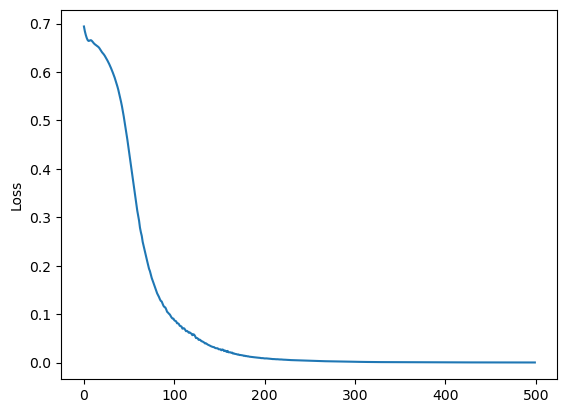

In [107]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel

In [111]:
#prediction in X_test data
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred= model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())


1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1


In [112]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[10, 97],
       [ 6, 41]], dtype=int64)

In [ ]:
#The above confusion martix says I got 97 and 6 correct predictions ,10 and 41 are my wrong results 

Text(95.72222222222221, 0.5, 'Predicted values')

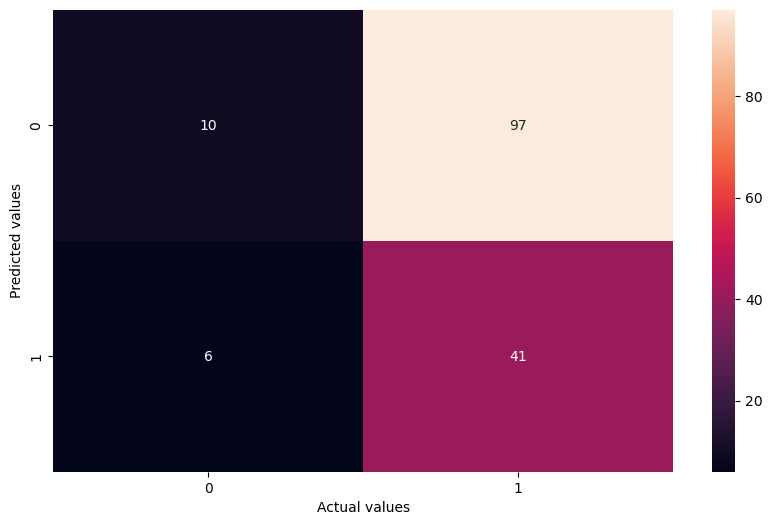

In [113]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')


In [114]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.33116883116883117

In [116]:
#save the model 
torch.save(model,'diabetes.pt')

In [118]:
#save and load the model 
model = torch.load('diabetes.pt')

C:\Users\TEJ SAI PRANAV REDDY\AppData\Local\Temp\ipykernel_26816\4280687347.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('diabetes.pt')


In [119]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)